### OVS-SGX

This notebook will be used to display the results of my optimized version of ovs-sgx.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
plt.rcParams['figure.figsize'] = (12.0, 6.0)
sns.set()

In [2]:
DATA_PATH = './data/permanent'

## 1. Flow table modifications

### 1.1 Add flows

#### 1.1.1 Simple flow
This benchmark consisted of adding a simple (only a single table flow table had to be consulted) flow to the flow tables.

In [3]:
add_flow_df = pd.read_csv(DATA_PATH + "/add_flow.csv");

In [4]:
add_flow_df.describe()

,BASELINE,SGX,OPTIMIZED,HOTCALL,HOTCALL+OPTIMIZED
count,2.000400e+04,2.000400e+04,2.000400e+04,2.000400e+04,20004.000000
mean,9.221528e+14,2.766458e+15,9.221528e+14,1.778981e+04,11129.986103
std,1.304251e+17,2.258917e+17,1.304251e+17,1.136045e+05,7290.864330
min,1.919000e+03,7.448000e+04,4.160800e+04,6.669000e+03,4257.000000
25%,4.651000e+03,1.008070e+05,5.467000e+04,1.153600e+04,8783.000000
50%,5.078500e+03,1.043050e+05,5.790700e+04,1.439700e+04,9920.000000
75%,6.118000e+03,1.116472e+05,6.422675e+04,1.778050e+04,11807.000000
max,1.844674e+19,1.844674e+19,1.844674e+19,1.326423e+07,418939.000000


The above table tells us that there is some very large outliers in the BASELINE and SGX classes. In order for these outliers to not mess up the plots, we will remove them.

In [5]:
add_flow_df = add_flow_df\
    .mask(add_flow_df > add_flow_df.quantile(0.95), axis=0)

In [6]:
add_flow_df.count()

BASELINE             19003
SGX                  19003
OPTIMIZED            19003
HOTCALL              19003
HOTCALL+OPTIMIZED    19003
dtype: int64

Median execution time for add-flow operaration:

In [7]:
add_flow_df.median()

BASELINE               5022.0
SGX                  103916.0
OPTIMIZED             57446.0
HOTCALL               13978.0
HOTCALL+OPTIMIZED      9793.0
dtype: float64

Text(0, 0.5, 'Time')

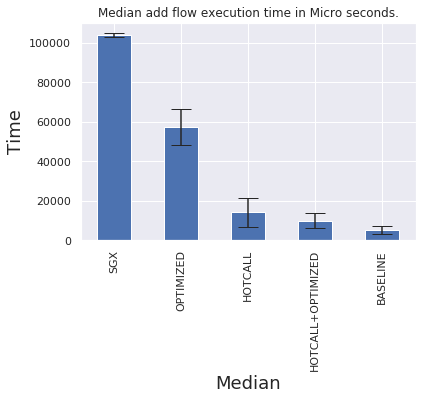

In [8]:
ax = add_flow_df \
    .median() \
    .sort_values(ascending=False) \
    .plot(kind='bar', 
          title="Median add flow execution time in Micro seconds.", 
          capsize=10, yerr=add_flow_df.std().tolist())
ax.set_xlabel('Median', fontsize=18)
ax.set_ylabel('Time', fontsize=18)

Text(0, 0.5, 'Time')

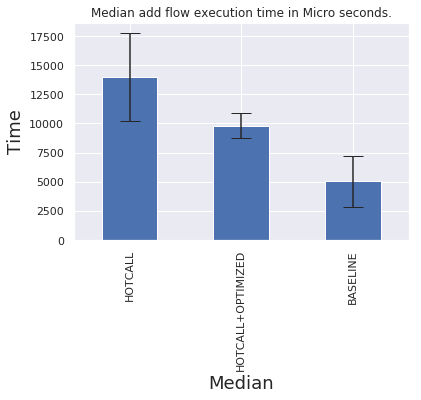

In [9]:
cols = ['HOTCALL', 'BASELINE', 'HOTCALL+OPTIMIZED']
ax = add_flow_df[cols] \
    .median() \
    .sort_values(ascending=False) \
    .plot(kind='bar', 
          title="Median add flow execution time in Micro seconds.", 
          capsize=10, yerr=add_flow_df[cols].std().tolist())
ax.set_xlabel('Median', fontsize=18)
ax.set_ylabel('Time', fontsize=18)

We can observe in the above boxplot that there are only outliers in the positive direction. 

### 1.2 Delete flows

### 1.2.1 strict

In [10]:
del_flow_strict_df = pd.read_csv(DATA_PATH + "/del_flow_strict.csv");

In [11]:
del_flow_strict_df.describe()

,BASELINE,SGX,OPTIMIZED,HOTCALL,HOTCALL+OPTIMIZED
count,20001.000000,20001.000000,20001.000000,2.000100e+04,2.000100e+04
mean,39880.136593,34622.453527,36015.799960,1.686245e+04,9.222911e+14
std,11298.813543,10733.491988,12235.200126,2.981830e+04,1.304349e+17
min,33057.000000,21955.000000,21450.000000,1.138300e+04,1.104000e+04
25%,34906.000000,28682.000000,30202.000000,1.405700e+04,1.386100e+04
50%,36372.000000,32312.000000,32927.000000,1.495500e+04,1.468700e+04
75%,42052.000000,36897.000000,38414.000000,1.695700e+04,1.641400e+04
max,265217.000000,265537.000000,401333.000000,3.017522e+06,1.844674e+19


In [12]:
del_flow_strict_df = del_flow_strict_df\
    .mask(del_flow_strict_df > del_flow_strict_df.quantile(0.95), axis=0)

Median execution time:

In [13]:
del_flow_strict_df.describe()

,BASELINE,SGX,OPTIMIZED,HOTCALL,HOTCALL+OPTIMIZED
count,19001.000000,19001.000000,19001.000000,19001.000000,19001.000000
mean,38118.553129,32753.670754,33915.454081,15523.348455,15184.615810
std,4283.985360,5198.742131,5144.540323,2238.003974,2088.886141
min,33057.000000,21955.000000,21450.000000,11383.000000,11040.000000
25%,34836.000000,28524.000000,30044.000000,14009.000000,13817.000000
50%,36165.000000,31987.000000,32673.000000,14849.000000,14597.000000
75%,40736.000000,35824.000000,37438.000000,16405.000000,15909.000000
max,50912.000000,49906.000000,51681.000000,23467.000000,22773.000000


Text(0, 0.5, 'Time')

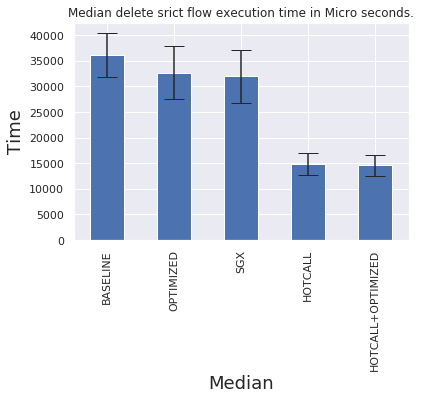

In [14]:
ax = del_flow_strict_df \
    .median() \
    .sort_values(ascending=False) \
    .plot(kind='bar', 
          title="Median delete srict flow execution time in Micro seconds.", 
          capsize=10, yerr=del_flow_strict_df.std().tolist())
ax.set_xlabel('Median', fontsize=18)
ax.set_ylabel('Time', fontsize=18)

### 1.2.2 loose

In [15]:
del_flow_loose_df = pd.read_csv(DATA_PATH + "/del_flow_loose.csv");

In [16]:
del_flow_loose_df.describe()

,BASELINE,SGX,OPTIMIZED,HOTCALL,HOTCALL+OPTIMIZED
count,20001.000000,2.000100e+04,20001.000000,2.000100e+04,20001.000000
mean,19547.822009,9.222911e+14,97113.904205,9.222911e+14,21459.793710
std,6996.363775,1.304349e+17,23436.476721,1.304349e+17,7914.592582
min,13863.000000,9.595700e+04,77407.000000,1.859500e+04,14445.000000
25%,16054.000000,1.065170e+05,86212.000000,2.388700e+04,18214.000000
50%,17457.000000,1.128790e+05,90390.000000,2.520600e+04,19470.000000
75%,20713.000000,1.249260e+05,98701.000000,2.799100e+04,22333.000000
max,136965.000000,1.844674e+19,486875.000000,1.844674e+19,209060.000000


In [17]:
del_flow_loose_df = del_flow_loose_df\
    .mask(del_flow_loose_df > del_flow_loose_df.quantile(0.99), axis=0)

Text(0, 0.5, 'Time')

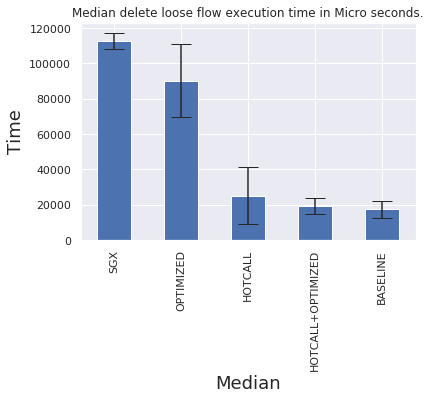

In [18]:
ax = del_flow_loose_df \
    .median() \
    .sort_values(ascending=False) \
    .plot(kind='bar', 
          title="Median delete loose flow execution time in Micro seconds.", 
          capsize=10, yerr=del_flow_loose_df.std().tolist())
ax.set_xlabel('Median', fontsize=18)
ax.set_ylabel('Time', fontsize=18)

## 1.3 Modify flows

### 1.3.1 strict

In [75]:
mod_flow_srict_df = pd.read_csv(DATA_PATH + "/mod_flow_strict.csv");

In [76]:
mod_flow_srict_df.describe()

,BASELINE,SGX,OPTIMIZED,HOTCALL,HOTCALL+OPTIMIZED
count,5001.000000,5001.000000,5.001000e+03,5.001000e+03,5001.000000
mean,7477.075785,76731.282543,7.377222e+15,3.688611e+15,11359.709258
std,3928.873369,15325.254794,3.688611e+17,2.608503e+17,8538.137094
min,4019.000000,57923.000000,4.272600e+04,7.070000e+03,5672.000000
25%,6075.000000,68744.000000,5.203800e+04,1.013400e+04,9097.000000
50%,6841.000000,73302.000000,5.564500e+04,1.152600e+04,10520.000000
75%,8158.000000,82001.000000,6.229200e+04,1.264300e+04,11557.000000
max,190184.000000,430334.000000,1.844674e+19,1.844674e+19,423194.000000


In [77]:
mod_flow_srict_df.median()

BASELINE              6841.0
SGX                  73302.0
OPTIMIZED            55645.0
HOTCALL              11526.0
HOTCALL+OPTIMIZED    10520.0
dtype: float64

In [78]:
#mod_flow_srict_df = mod_flow_srict_df\
#    .mask(mod_flow_srict_df > mod_flow_srict_df.quantile(0.95), axis=0)

Text(0, 0.5, 'Time')

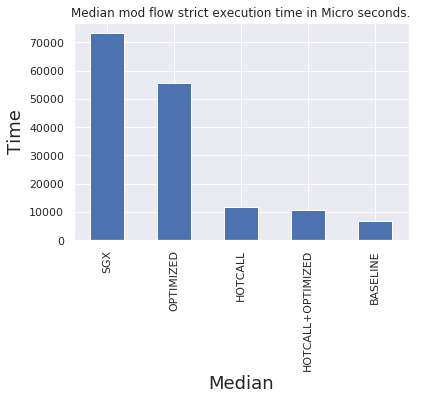

In [79]:
ax = mod_flow_srict_df \
    .median() \
    .sort_values(ascending=False) \
    .plot(kind='bar', 
          title="Median mod flow strict execution time in Micro seconds.")
ax.set_xlabel('Median', fontsize=18)
ax.set_ylabel('Time', fontsize=18)

### 1.3.2 loose

In [35]:
mod_flow_loose_df = pd.read_csv(DATA_PATH + "/mod_flow_loose.csv");

In [36]:
mod_flow_loose_df.describe()

,BASELINE,SGX,OPTIMIZED,HOTCALL,HOTCALL+OPTIMIZED
count,20001.000000,2.000100e+04,2.000100e+04,2.000100e+04,2.000100e+04
mean,17435.293635,2.766873e+15,9.222911e+14,1.844582e+15,1.793267e+04
std,4634.230043,2.259086e+17,1.304349e+17,1.844582e+17,1.557761e+04
min,12968.000000,6.517300e+04,4.703600e+04,1.714200e+04,1.157800e+04
25%,15229.000000,7.355900e+04,5.591700e+04,2.021000e+04,1.430400e+04
50%,15917.000000,7.631900e+04,5.845300e+04,2.176000e+04,1.598300e+04
75%,18691.000000,8.207100e+04,6.342400e+04,2.398900e+04,1.842800e+04
max,114085.000000,1.844674e+19,1.844674e+19,1.844674e+19,1.641541e+06


In [37]:
mod_flow_loose_df = mod_flow_loose_df\
    .mask(mod_flow_loose_df > mod_flow_loose_df.quantile(0.95), axis=0)

Text(0, 0.5, 'Time')

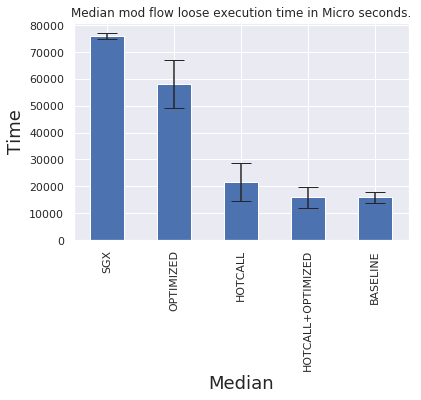

In [38]:
ax = mod_flow_loose_df \
    .median() \
    .sort_values(ascending=False) \
    .plot(kind='bar', 
          title="Median mod flow loose execution time in Micro seconds.", 
          capsize=10, yerr=add_flow_df.std().tolist())
ax.set_xlabel('Median', fontsize=18)
ax.set_ylabel('Time', fontsize=18)

# 2 Flow eviction